# Reading The Data

In [221]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
from copy import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn import metrics
%matplotlib inline

In [223]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR_Analysis/train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [225]:
df.duplicated().sum()

0

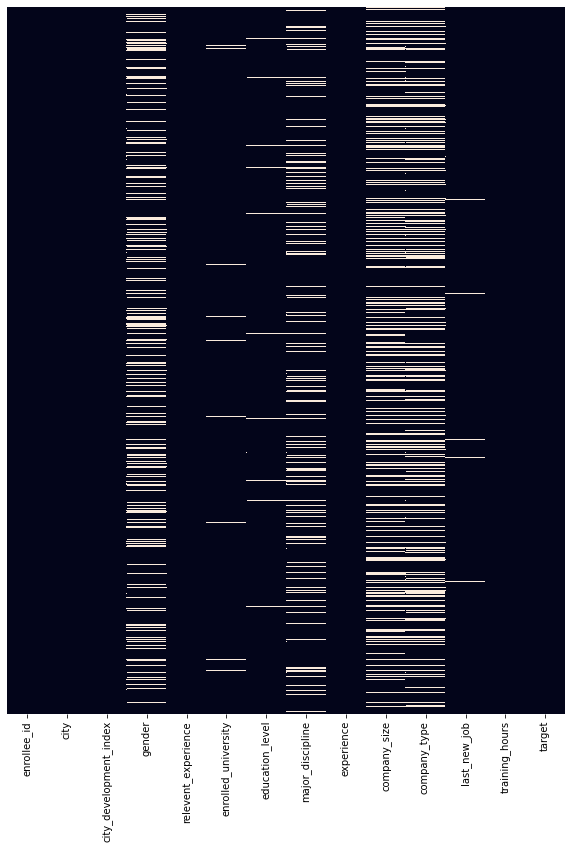

In [505]:
plt.figure(figsize=(10,13))
sns.heatmap(df.isnull(), cbar = False)
plt.yticks([])
plt.show()

In [361]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3906
relevent_experience          0
enrolled_university        229
education_level            292
major_discipline          2610
experience                  39
company_size              4551
company_type              4807
last_new_job               282
training_hours               0
target                       0
dtype: int64

In [228]:
round((df.isnull().sum() / df.shape[0])*100, 2)

enrollee_id                0.00
city                       0.00
city_development_index     0.00
gender                    22.32
relevent_experience        0.00
enrolled_university        1.86
education_level            2.49
major_discipline          15.46
experience                 0.32
company_size              26.03
company_type              27.45
last_new_job               2.00
training_hours             0.00
target                     0.00
dtype: float64

In [229]:
print('Number of Rows Containing 4 NULLs or more:', (df.shape[0] - df.dropna(thresh=10).shape[0]))
print('Percentage:', round(((df.shape[0] - df.dropna(thresh=10).shape[0])/df.shape[0])*100, 2), '%')

Number of Rows Containing 4 NULLs or more: 236
Percentage: 1.29 %


In [230]:
df.dropna(thresh=10, inplace=True)

In [231]:
df.company_size.replace('10/49', '10-49', inplace=True)

In [232]:
df.company_size.replace('100-500', '100-499', inplace=True)

In [233]:
df.shape

(18123, 14)

# Predicting NULL Values

- ## The Columns to predict their null values
    - enrolled_university
    - education_level
    - major_discipline
    - experience
    - company_size
    - company_type
    - last_new_job
    - gender

In [ ]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3906
relevent_experience          0
enrolled_university        229
education_level            292
major_discipline          2610
experience                  39
company_size              4551
company_type              4807
last_new_job               282
training_hours               0
target                       0
dtype: int64

- ## Getting the training data ready

In [239]:
training_data = df.dropna(thresh=14)
training_data.shape

(9287, 14)

In [240]:
training_data.drop('enrollee_id', axis=1, inplace=True);

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [241]:
training_data_2 = copy(training_data)

In [242]:
training_data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-499,Pvt Ltd,1,106,0
1,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
3,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
5,city_21,0.624,Female,Has relevent experience,no_enrollment,Graduate,Other,8,5000-9999,Pvt Ltd,2,34,0
6,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,10000+,Pvt Ltd,3,23,1


In [243]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [244]:
encoding_columns = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience',
                    'company_size', 'company_type', 'last_new_job', 'target']
encoder = {}
for column in encoding_columns:
    encoder[column] = LabelEncoder()
    training_data_2[column] = encoder[column].fit_transform(training_data_2[column])

In [245]:
training_data_2.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,39,0.689,1,0,2,0,5,13,1,5,0,106,0
1,104,0.923,1,0,2,0,5,5,7,1,0,69,0
3,87,0.666,1,0,2,0,5,5,4,5,0,26,0
5,60,0.624,0,0,2,0,4,18,6,5,1,34,0
6,60,0.624,1,0,2,0,5,16,3,5,2,23,1


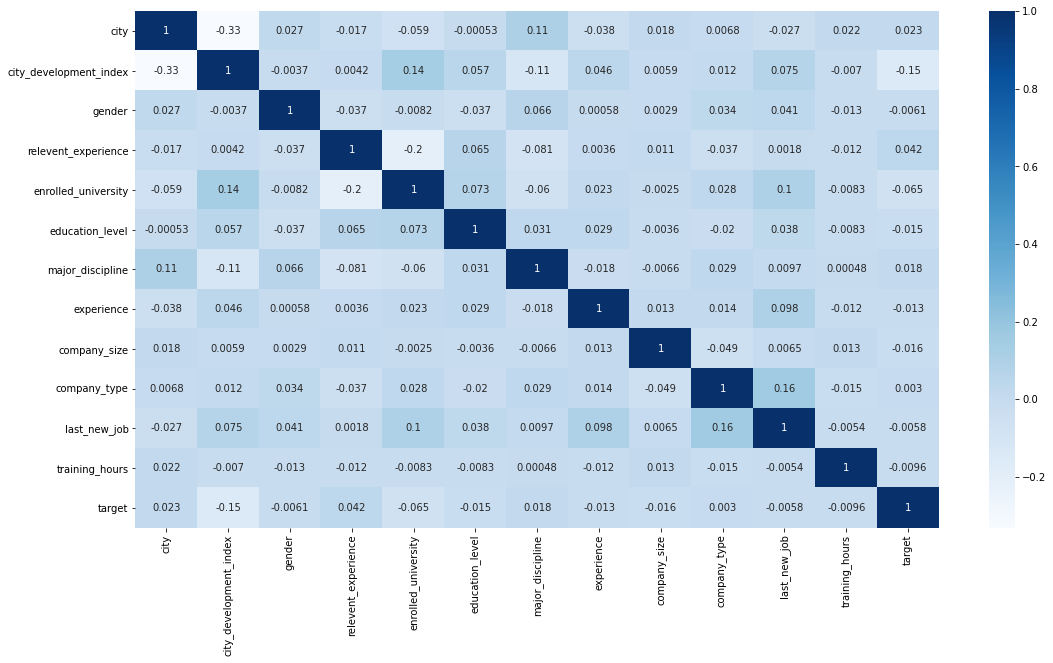

In [246]:
plt.figure(figsize=(18,9.5))
sns.heatmap(training_data_2.corr(),cbar = True, annot =True, cmap="Blues");

- ## Normalizing Training data

In [247]:
def normalize_columns(column):
    return (training_data_2[column] - training_data_2[column].min()) / (training_data_2[column].max() - training_data_2[column].min())

In [248]:
for column in training_data.columns:
    training_data_2[column] = normalize_columns(column)

In [249]:
training_data_2.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.342105,0.481038,0.5,0.0,1.0,0.0,1.0,0.619048,0.142857,1.0,0.0,0.313433,0.0
1,0.912281,0.948104,0.5,0.0,1.0,0.0,1.0,0.238095,1.000000,0.2,0.0,0.202985,0.0
3,0.763158,0.435130,0.5,0.0,1.0,0.0,1.0,0.238095,0.571429,1.0,0.0,0.074627,0.0
5,0.526316,0.351297,0.0,0.0,1.0,0.0,0.8,0.857143,0.857143,1.0,0.2,0.098507,0.0
6,0.526316,0.351297,0.5,0.0,1.0,0.0,1.0,0.761905,0.428571,1.0,0.4,0.065672,1.0


- ## `1.`Enrolled University Column

In [250]:
columns = ['city_development_index', 'relevent_experience', 'education_level', 'major_discipline', 'experience',
                    'company_type', 'last_new_job', 'training_hours', 'target']

In [251]:
X = training_data_2.loc[:,columns].values
Y = training_data.enrolled_university

In [252]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=30)

In [253]:
rf_grid = {
 'max_depth': [10, 20, 30, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [200, 400, 600]}

In [254]:
from sklearn.ensemble import RandomForestClassifier

eu_classifier = GridSearchCV(estimator= RandomForestClassifier(), param_grid=rf_grid, cv = 3, n_jobs=-1,verbose=1)
eu_classifier.fit(x_train, y_train) 

# Summarize results
print("Best: %f using %s" % (eu_classifier.best_score_, eu_classifier.best_params_))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  2.0min finished


Best: 0.854923 using {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}


In [255]:
eu_predictions = eu_classifier.predict(x_test) 
   
# print classification report 
print(metrics.classification_report(y_test, eu_predictions))

                  precision    recall  f1-score   support

Full time course       0.63      0.07      0.12       258
Part time course       0.00      0.00      0.00       168
   no_enrollment       0.85      1.00      0.92      2361

        accuracy                           0.85      2787
       macro avg       0.49      0.35      0.35      2787
    weighted avg       0.78      0.85      0.79      2787



Training Accuracy: 87.86 %
Testing Accuracy: 85.04 %


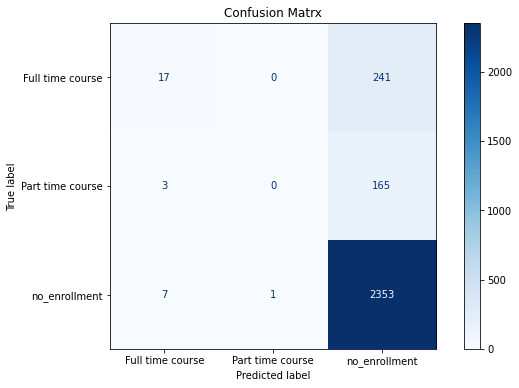

In [256]:
accuracy = eu_classifier.score(x_train, y_train)
print('Training Accuracy:', round(accuracy *100, 2), '%')

accuracy = eu_classifier.score(x_test, y_test)
print('Testing Accuracy:', round(accuracy *100, 2), '%')

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')
chart = metrics.plot_confusion_matrix(eu_classifier, x_test, y_test, display_labels= encoder['enrolled_university'].classes_, ax = ax, cmap="Blues", values_format = '.0f')
chart.confusion_matrix;

- ## `2` Major Discipline

In [372]:
columns = ['city', 'city_development_index', 'enrolled_university', 'relevent_experience', 'last_new_job', 'target']

In [373]:
X = training_data_2.loc[:,columns].values
Y = training_data.major_discipline

In [374]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=30)

Training Accuracy: 89.4 %
Testing Accuracy: 88.09 %


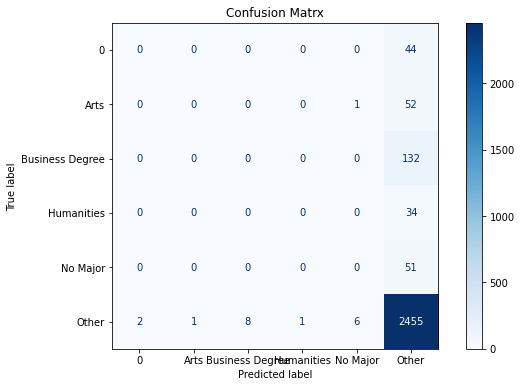

In [375]:
# Random Forest
md_classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 42)
md_classifier.fit(x_train, y_train) 

accuracy = md_classifier.score(x_train, y_train)
print('Training Accuracy:', round(accuracy *100, 2), '%')

accuracy = md_classifier.score(x_test, y_test)
print('Testing Accuracy:', round(accuracy *100, 2), '%')

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')
chart = metrics.plot_confusion_matrix(md_classifier, x_test, y_test, display_labels= encoder['major_discipline'].classes_, ax = ax, cmap="Blues", values_format='.0f')
chart.confusion_matrix;

  - ## Filling Enrolled University Column

In [508]:
df_3 = copy(df)

In [509]:
df_3.fillna('0', inplace=True)

In [510]:
x_test = df_3[df_3['enrolled_university'] == '0']
x_test.shape

(229, 14)

In [511]:
columns = ['enrollee_id', 'city_development_index', 'relevent_experience', 'education_level', 'major_discipline', 'experience',
                    'company_type', 'last_new_job', 'training_hours', 'target']

x_test = x_test.loc[:, columns]
x_test.head()

,enrollee_id,city_development_index,relevent_experience,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
23,25178,0.939,No relevent experience,Graduate,STEM,1,0,never,11,0
57,12935,0.624,Has relevent experience,Masters,STEM,12,0,1,98,1
191,9387,0.754,Has relevent experience,High School,0,6,Funded Startup,2,20,0
401,15207,0.887,No relevent experience,Masters,STEM,7,0,1,64,0
537,9235,0.624,No relevent experience,Graduate,STEM,3,0,1,42,0


In [512]:
x_test.shape

(229, 10)

In [513]:
encoding_columns_eu = [ 'relevent_experience', 'education_level', 'major_discipline', 'experience', 'company_type', 'last_new_job', 'target']
eu_encoder = {}
for column in encoding_columns_eu:
    encoder[column] = LabelEncoder()
    x_test[column] = encoder[column].fit_transform(x_test[column])

In [514]:
x_test.head()

,enrollee_id,city_development_index,relevent_experience,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
23,25178,0.939,1,1,6,1,0,6,11,0
57,12935,0.624,0,3,6,4,0,1,98,1
191,9387,0.754,0,2,0,16,2,2,20,0
401,15207,0.887,1,3,6,17,0,1,64,0
537,9235,0.624,1,1,6,13,0,1,42,0


In [515]:
def normalize_columns(column):
    return (x_test[column] - x_test[column].min()) / (x_test[column].max() - x_test[column].min())

In [516]:
for column in x_test.columns[1:]:
    x_test[column] = normalize_columns(column)

In [517]:
x_test.head()

,enrollee_id,city_development_index,relevent_experience,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
23,25178,1.000000,1.0,0.2,1.0,0.047619,0.0,1.000000,0.027108,0.0
57,12935,0.358452,0.0,0.6,1.0,0.190476,0.0,0.166667,0.289157,1.0
191,9387,0.623218,0.0,0.4,0.0,0.761905,0.4,0.333333,0.054217,0.0
401,15207,0.894094,1.0,0.6,1.0,0.809524,0.0,0.166667,0.186747,0.0
537,9235,0.358452,1.0,0.2,1.0,0.619048,0.0,0.166667,0.120482,0.0


In [518]:
enrolled_university = copy(x_test.enrollee_id)

In [519]:
enrolled_university = pd.DataFrame({'enrollee_id':enrolled_university, 'enrolled_university':eu_classifier.predict(x_test.iloc[:,1:])})

In [520]:
enrolled_university.head()

,enrollee_id,enrolled_university
23,25178,no_enrollment
57,12935,no_enrollment
191,9387,no_enrollment
401,15207,no_enrollment
537,9235,no_enrollment


In [521]:
for i in enrolled_university.enrollee_id.unique():
  df_3.loc[df_3.enrollee_id == i, 'enrolled_university'] = enrolled_university.query(f'enrollee_id == {i}').enrolled_university

In [522]:
df_3.enrolled_university.unique()

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)

- ## Filling Major Discipline Column

In [523]:
x_test = df_3[df_3['major_discipline'] == '0']
x_test.shape

(2610, 14)

In [524]:
columns = ['enrollee_id', 'city', 'city_development_index', 'enrolled_university', 'relevent_experience', 'last_new_job', 'target']

x_test = x_test.loc[:, columns]
x_test.head()

,enrollee_id,city,city_development_index,enrolled_university,relevent_experience,last_new_job,target
15,19752,city_75,0.939,Full time course,Has relevent experience,1,0
22,20897,city_136,0.897,no_enrollment,Has relevent experience,1,0
24,3472,city_16,0.910,no_enrollment,Has relevent experience,>4,1
25,30466,city_10,0.895,Full time course,No relevent experience,1,0
41,4653,city_114,0.926,no_enrollment,No relevent experience,never,0


In [525]:
x_test.shape

(2610, 7)

In [526]:
encoding_columns_md = [ 'city', 'enrolled_university', 'relevent_experience', 'last_new_job', 'target']
md_encoder = {}
for column in encoding_columns_md:
    encoder[column] = LabelEncoder()
    x_test[column] = encoder[column].fit_transform(x_test[column])

In [527]:
x_test.head()

,enrollee_id,city,city_development_index,enrolled_university,relevent_experience,last_new_job,target
15,19752,87,0.939,0,0,1,0
22,20897,25,0.897,2,0,1,0
24,3472,40,0.910,2,0,5,1
25,30466,1,0.895,0,1,1,0
41,4653,13,0.926,2,1,6,0


In [528]:
def normalize_columns(column):
    return (x_test[column] - x_test[column].min()) / (x_test[column].max() - x_test[column].min())

In [529]:
for column in x_test.columns[1:]:
    x_test[column] = normalize_columns(column)

In [530]:
x_test.head()

,enrollee_id,city,city_development_index,enrolled_university,relevent_experience,last_new_job,target
15,19752,0.828571,0.980040,0.0,0.0,0.166667,0.0
22,20897,0.238095,0.896208,1.0,0.0,0.166667,0.0
24,3472,0.380952,0.922156,1.0,0.0,0.833333,1.0
25,30466,0.009524,0.892216,0.0,1.0,0.166667,0.0
41,4653,0.123810,0.954092,1.0,1.0,1.000000,0.0


In [531]:
major_discipline = copy(x_test.enrollee_id)

In [532]:
major_discipline = pd.DataFrame({'enrollee_id':major_discipline, 'major_discipline':md_classifier.predict(x_test.iloc[:,1:])})

In [533]:
major_discipline.head()

,enrollee_id,major_discipline
15,19752,STEM
22,20897,STEM
24,3472,STEM
25,30466,STEM
41,4653,STEM


In [534]:
for i in major_discipline.enrollee_id.unique():
  df_3.loc[df_3.enrollee_id == i, 'major_discipline'] = major_discipline.query(f'enrollee_id == {i}').major_discipline

In [535]:
df_3.major_discipline.unique()

array(['STEM', 'Other', 'No Major', 'Business Degree', 'Arts',
       'Humanities'], dtype=object)

In [536]:
df = copy(df_3)

In [538]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-499,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,0,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,0,No relevent experience,no_enrollment,Masters,STEM,8,0,0,2,88,1


In [540]:
df.replace('0', 'Unknown', inplace=True)

# Exploratory Data Analysis

## Question to be asked about the Data:
Q1: All columns vs Target<br>
Q2: Distribution data of all columns<br>
Q3: What are the three most important things we need to focus on to improve employee
engagement?<br>
Q4: What are the three most important things we need to focus on to decrease the numer looking for a new job?<br>
Q5: What are the trainee most effective features that does not look for another job?<br>
Q6: what is the effect of training hours that causing the trainee to look for another job?<br>

In [541]:
color = sns.color_palette('muted')
color_2 = sns.color_palette("Paired")
color_3 = sns.color_palette('pastel')
color_3

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

- ## Univariate Charts

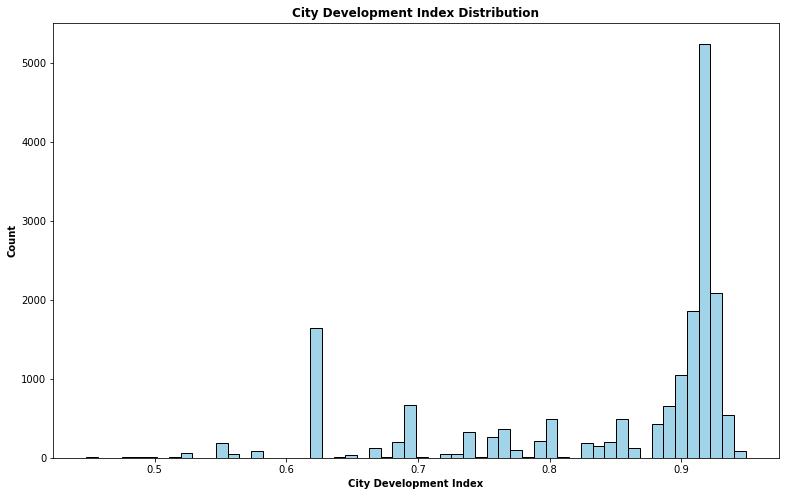

In [542]:
plt.figure(figsize=(13,8))
sns.histplot(data=df, x='city_development_index', color=color[9]);

plt.title('City Development Index Distribution', fontweight="bold")
plt.xlabel('City Development Index', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

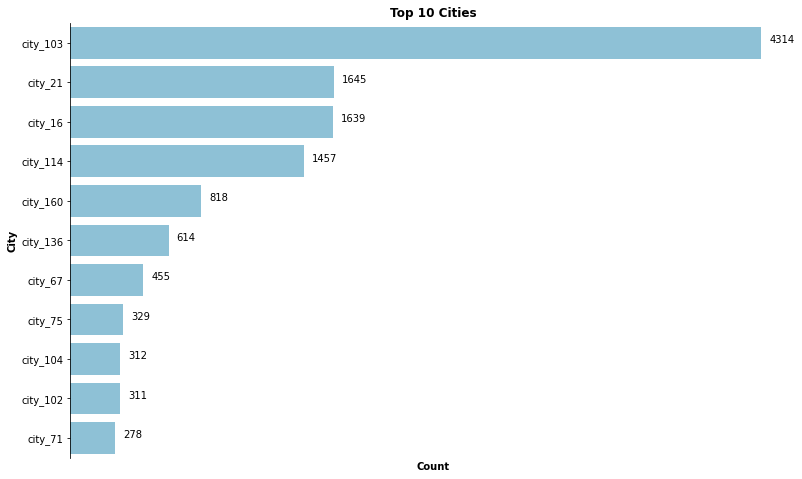

In [543]:
city_10 = df['city'].value_counts()[:11]

plt.figure(figsize=(13,8))
sns.barplot(x=city_10, y=city_10.index, color=color[9]);
#plt.xaxis.set_visible(False)
plt.xlabel('Count')
plt.ylabel('City')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.title('Top 10 Cities', fontweight="bold")
plt.xlabel('Count', fontweight="bold")
plt.ylabel('City', fontweight="bold")
plt.xticks([])
for i in range(len(city_10)):
    plt.text(city_10[i]+50, i, city_10[i])

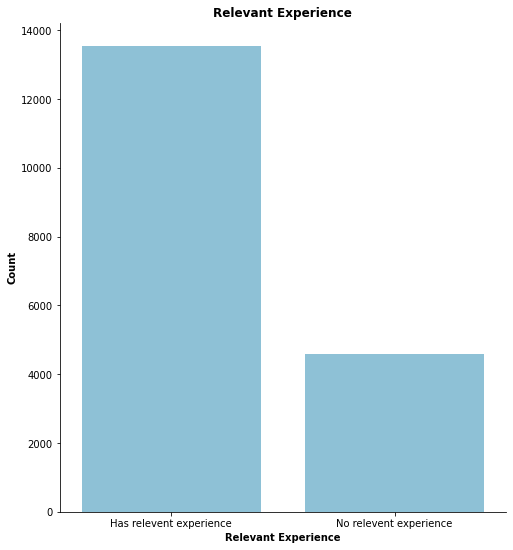

In [571]:
plt.figure(figsize=(8,9))
sns.countplot(data=df, x='relevent_experience', color=color[9]);
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Relevant Experience', fontweight="bold")
plt.xlabel('Relevant Experience', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

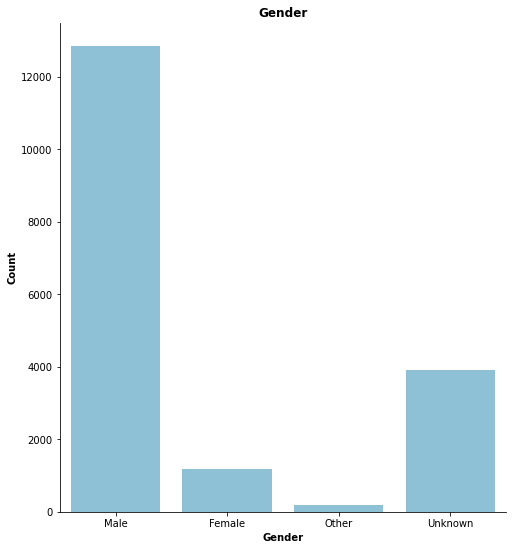

In [574]:
order = ['Male', 'Female', 'Other', 'Unknown']
plt.figure(figsize=(8,9))
sns.countplot(data=df, x='gender', color=color[9], order=order);

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Gender', fontweight="bold")
plt.xlabel('Gender', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

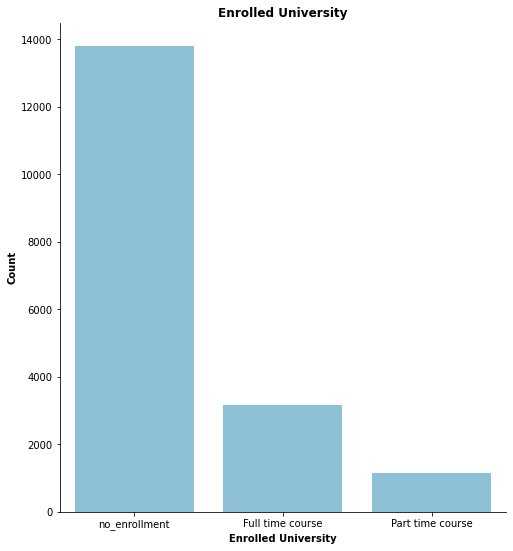

In [573]:
plt.figure(figsize=(8,9))
sns.countplot(data=df, x='enrolled_university', color=color[9]);

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Enrolled University', fontweight="bold")
plt.xlabel('Enrolled University', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

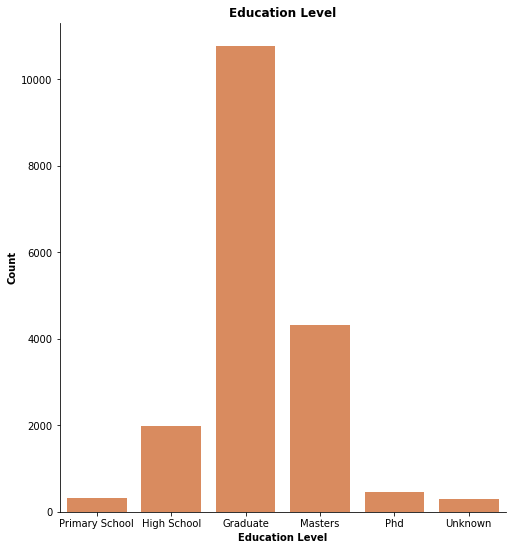

In [577]:
plt.figure(figsize=(8,9))
order = ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd', 'Unknown']

sns.countplot(data=df, x='education_level', color=color[1], order=order);

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Education Level', fontweight="bold")
plt.xlabel('Education Level', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

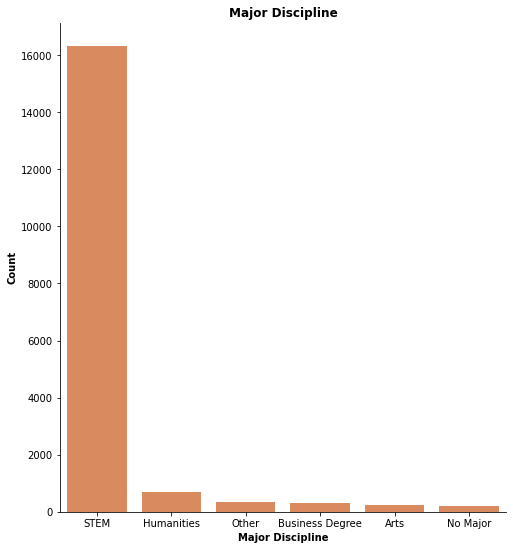

In [549]:
plt.figure(figsize=(8,9))
sns.countplot(data=df, x='major_discipline', color=color[1], order=df.major_discipline.value_counts().index);

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Major Discipline', fontweight="bold")
plt.xlabel('Major Discipline', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

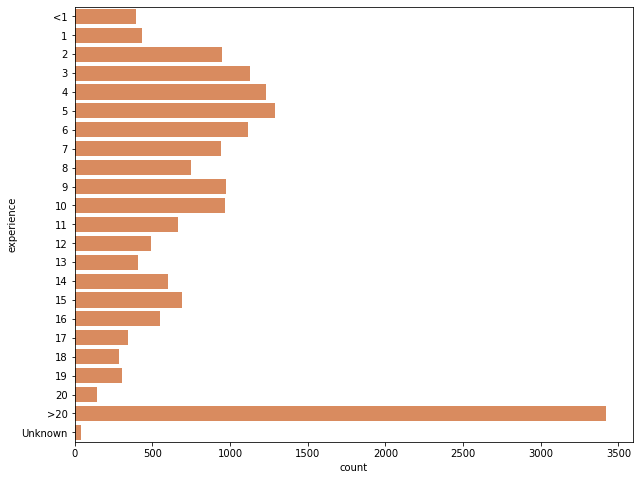

In [579]:
order = ['<1']
for i in range(20):
  order.append(str(i+1))
order.append('>20')
order.append('Unknown')

plt.figure(figsize=(10,8));
sns.countplot(data=df, y='experience', color=color[1], order=order);

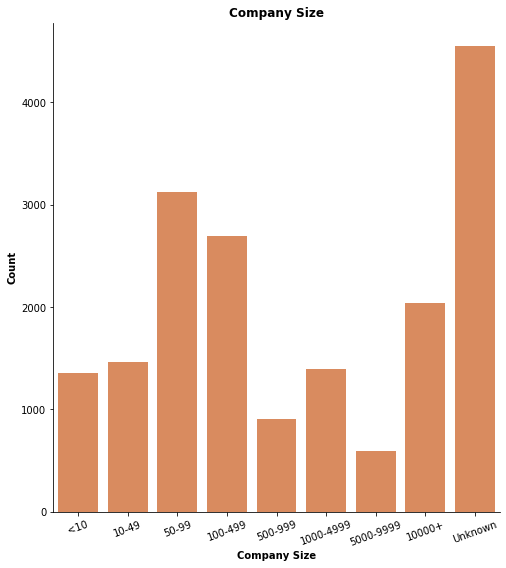

In [580]:
plt.figure(figsize=(8,9))
order = ['<10', '10-49', '50-99', '100-499', '500-999', '1000-4999', '5000-9999', '10000+', 'Unknown']
sns.countplot(data=df, x='company_size', color=color[1], order=order);

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Company Size', fontweight="bold")
plt.xlabel('Company Size', fontweight="bold")
plt.ylabel('Count', fontweight="bold");
plt.xticks(rotation=20);

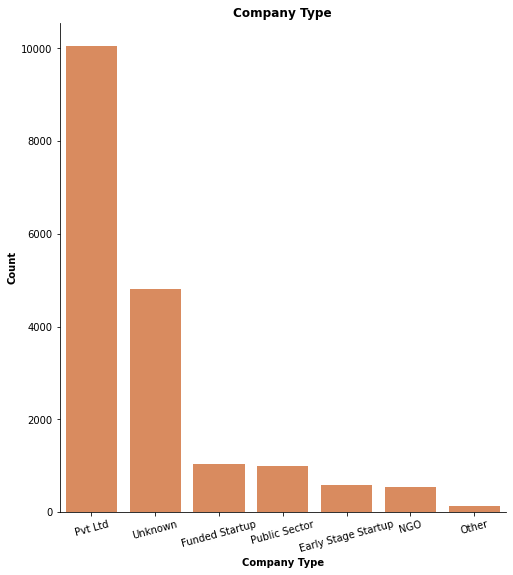

In [581]:
plt.figure(figsize=(8,9))
sns.countplot(data=df, x='company_type', color=color[1], order=df.company_type.value_counts().index);

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Company Type', fontweight="bold")
plt.xlabel('Company Type', fontweight="bold")
plt.ylabel('Count', fontweight="bold");
plt.xticks(rotation=15);

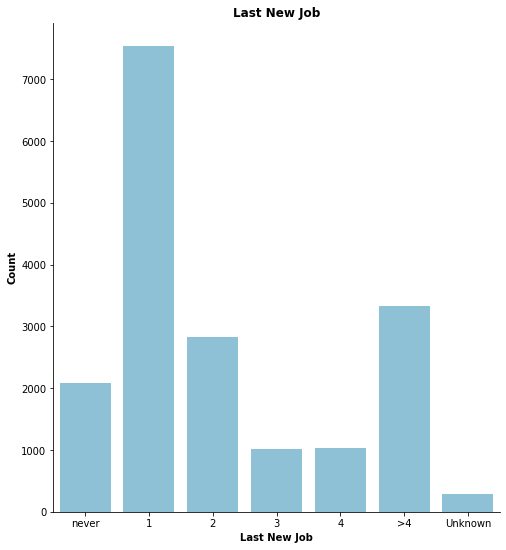

In [582]:
plt.figure(figsize=(8,9))
order = ['never', '1', '2', '3', '4', '>4', 'Unknown']
sns.countplot(data=df, x='last_new_job', color=color[9], order=order);

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Last New Job', fontweight="bold")
plt.xlabel('Last New Job', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

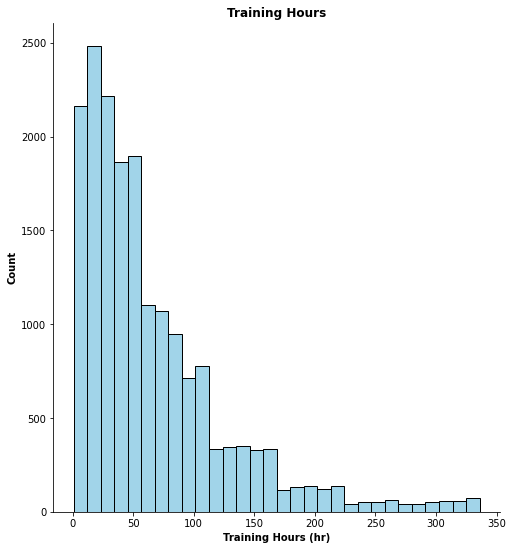

In [554]:
plt.figure(figsize=(8,9))
sns.histplot(data=df, x='training_hours', bins=30, color=color[9]);

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Training Hours', fontweight="bold")
plt.xlabel('Training Hours (hr)', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

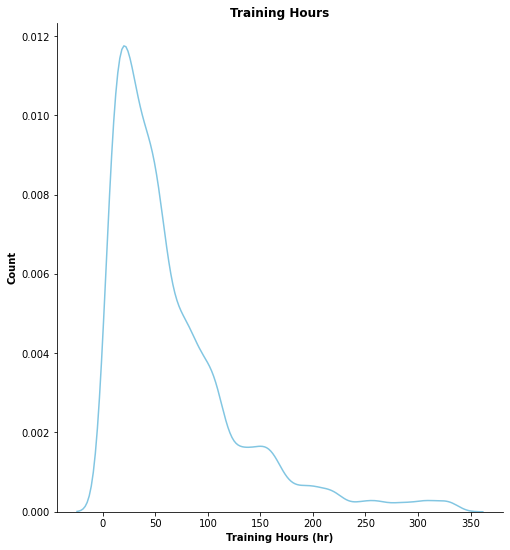

In [555]:
plt.figure(figsize=(8,9))
sns.kdeplot(data=df, x='training_hours', color=color[9]);

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Training Hours', fontweight="bold")
plt.xlabel('Training Hours (hr)', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

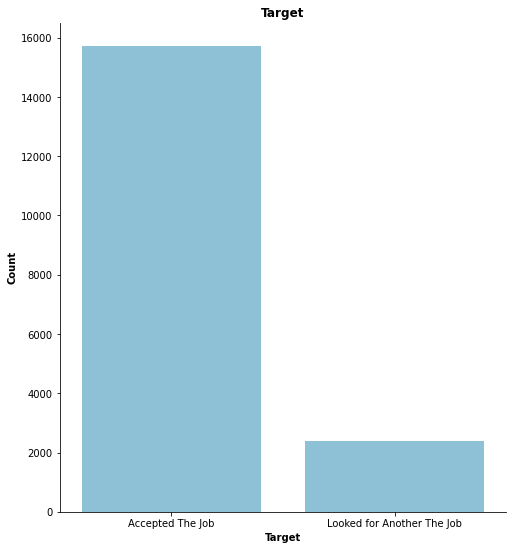

In [556]:
plt.figure(figsize=(8,9))
sns.countplot(data=df, x='target', color=color[9]);

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Target', fontweight="bold")
plt.xlabel('Target', fontweight="bold")
plt.ylabel('Count', fontweight="bold");
plt.xticks((0,1), labels=('Accepted The Job', 'Looked for Another The Job'));

- ## Bivariate Charts

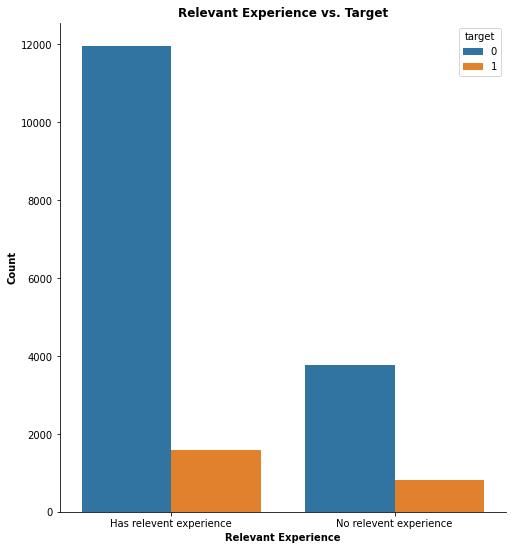

In [592]:
plt.figure(figsize=(8,9))
sns.countplot(data=df, x='relevent_experience', hue='target');

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Relevant Experience vs. Target', fontweight="bold")
plt.xlabel('Relevant Experience', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

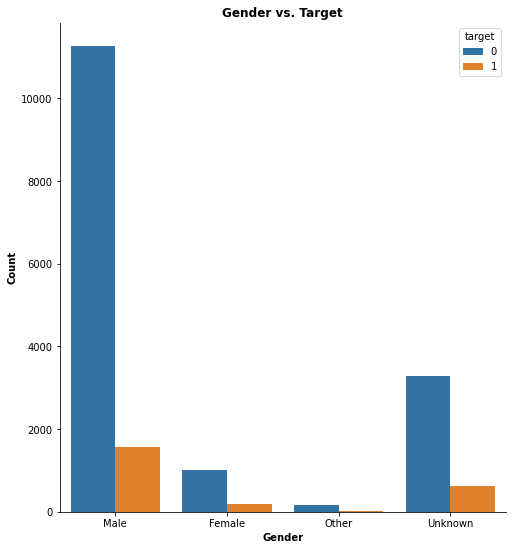

In [593]:
plt.figure(figsize=(8,9))
sns.countplot(data=df, x='gender', hue='target', order=['Male', 'Female', 'Other', 'Unknown']);
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Gender vs. Target', fontweight="bold")
plt.xlabel('Gender', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

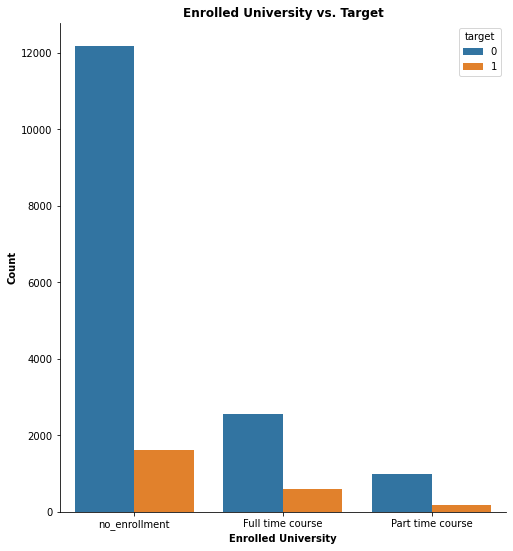

In [594]:
plt.figure(figsize=(8,9))
sns.countplot(data=df, x='enrolled_university', hue='target');
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Enrolled University vs. Target', fontweight="bold")
plt.xlabel('Enrolled University', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

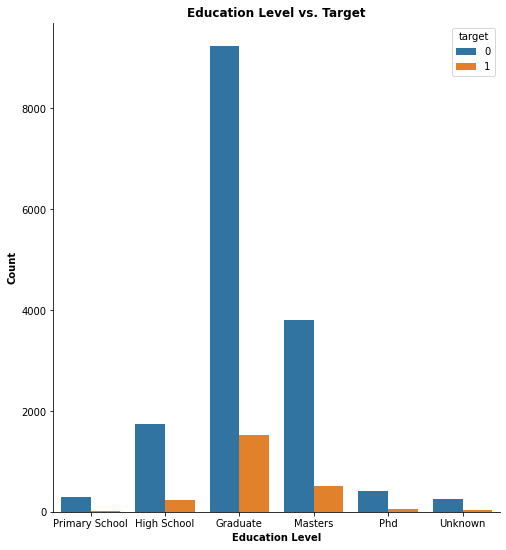

In [595]:
plt.figure(figsize=(8,9))
order = ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd', 'Unknown']

sns.countplot(data=df, x='education_level', hue='target', order=order);

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Education Level vs. Target', fontweight="bold")
plt.xlabel('Education Level', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

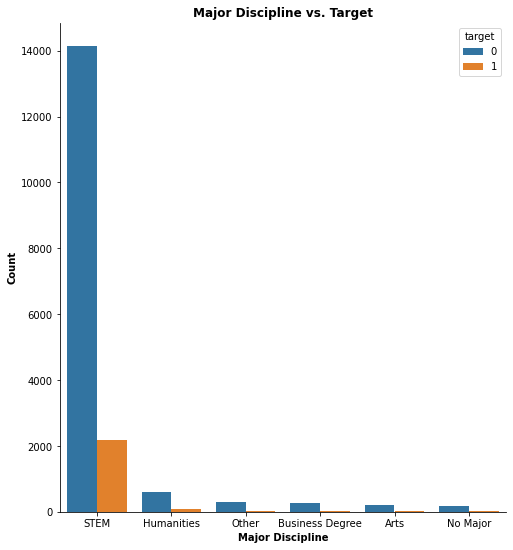

In [596]:
plt.figure(figsize=(8,9))
sns.countplot(data=df, x='major_discipline', hue='target', order=df.major_discipline.value_counts().index);

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Major Discipline vs. Target', fontweight="bold")
plt.xlabel('Major Discipline', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

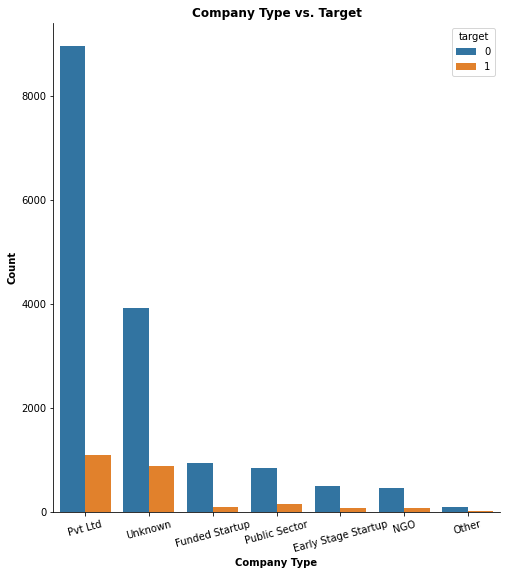

In [597]:
plt.figure(figsize=(8,9))
sns.countplot(data=df, x='company_type', hue='target', order=df.company_type.value_counts().index);

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Company Type vs. Target', fontweight="bold")
plt.xlabel('Company Type', fontweight="bold")
plt.ylabel('Count', fontweight="bold");
plt.xticks(rotation=15);

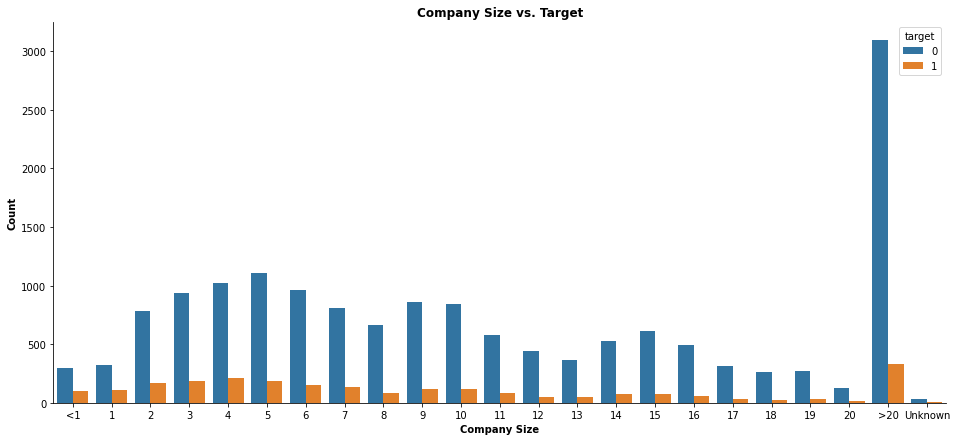

In [600]:
order = ['<1']
for i in range(20):
  order.append(str(i+1))
order.append('>20')
order.append('Unknown')

plt.figure(figsize=(16,7))
sns.countplot(data=df, x='experience', hue='target', order=order);
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Company Size vs. Target', fontweight="bold")
plt.xlabel('Company Size', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

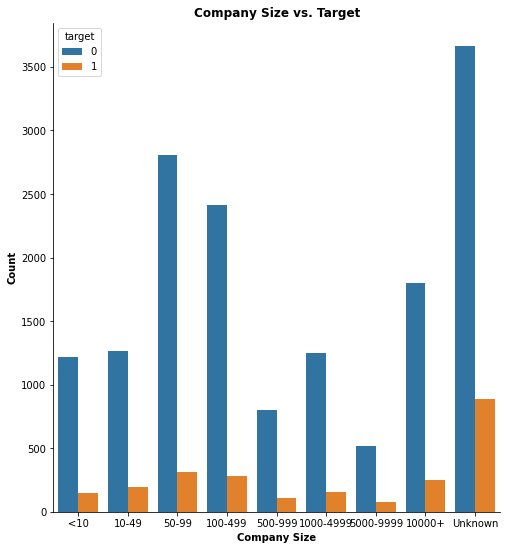

In [601]:
plt.figure(figsize=(8,9))
order = ['<10', '10-49', '50-99', '100-499', '500-999', '1000-4999', '5000-9999', '10000+', 'Unknown']

sns.countplot(data=df, x='company_size', hue='target', order=order);
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Company Size vs. Target', fontweight="bold")
plt.xlabel('Company Size', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

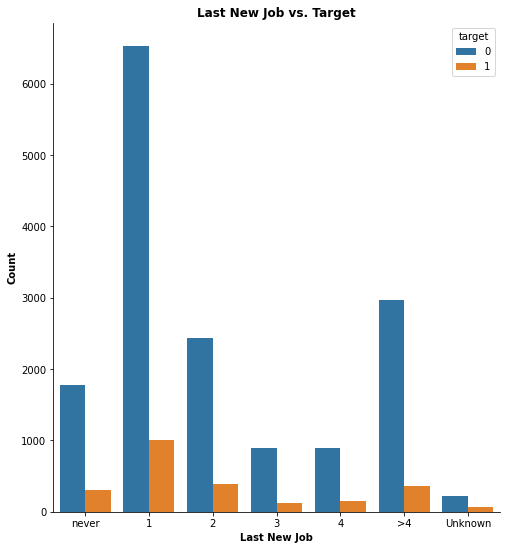

In [602]:
plt.figure(figsize=(8,9))
order = ['never', '1', '2', '3', '4', '>4', 'Unknown']
sns.countplot(data=df, x='last_new_job', hue='target', order=order);

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Last New Job vs. Target', fontweight="bold")
plt.xlabel('Last New Job', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

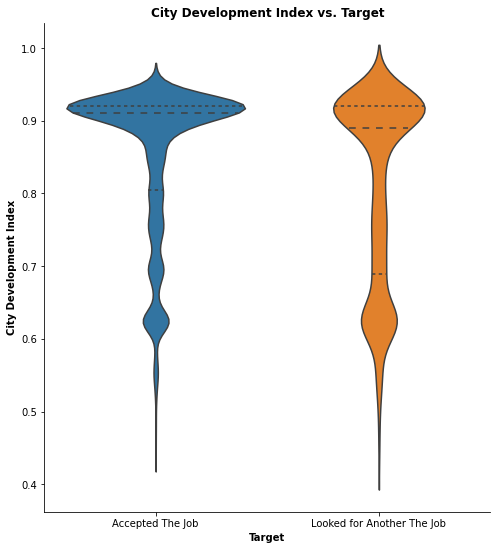

In [566]:
plt.figure(figsize=(8,9))
sns.violinplot(data=df, y='city_development_index', x='target', inner='quartile');

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('City Development Index vs. Target', fontweight="bold")
plt.xlabel('Target', fontweight="bold")
plt.ylabel('City Development Index', fontweight="bold");
plt.xticks((0,1), labels=('Accepted The Job', 'Looked for Another The Job'));

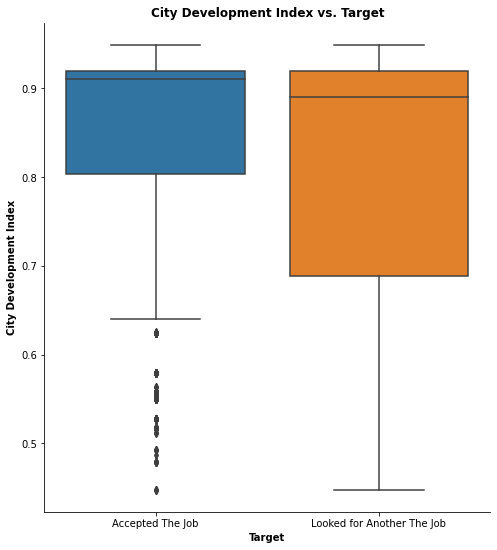

In [567]:
plt.figure(figsize=(8,9))
sns.boxplot(data=df, y='city_development_index', x='target');

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('City Development Index vs. Target', fontweight="bold")
plt.xlabel('Target', fontweight="bold")
plt.ylabel('City Development Index', fontweight="bold");
plt.xticks((0,1), labels=('Accepted The Job', 'Looked for Another The Job'));

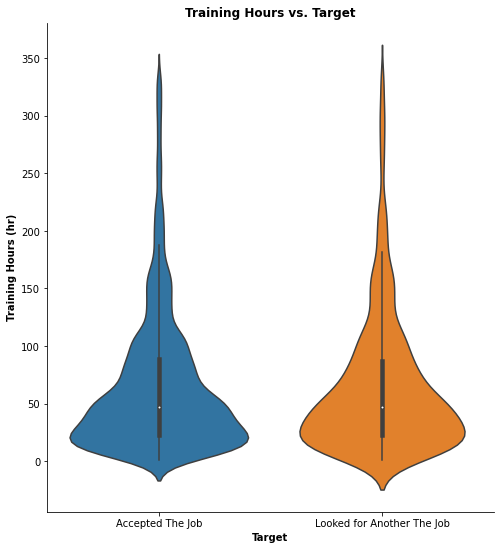

In [568]:
plt.figure(figsize=(8,9))
sns.violinplot(data=df, y='training_hours', x='target');

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Training Hours vs. Target', fontweight="bold")
plt.xlabel('Target', fontweight="bold")
plt.ylabel('Training Hours (hr)', fontweight="bold");
plt.xticks((0,1), labels=('Accepted The Job', 'Looked for Another The Job'));

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 92.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.2% of the points cannot be placed; y

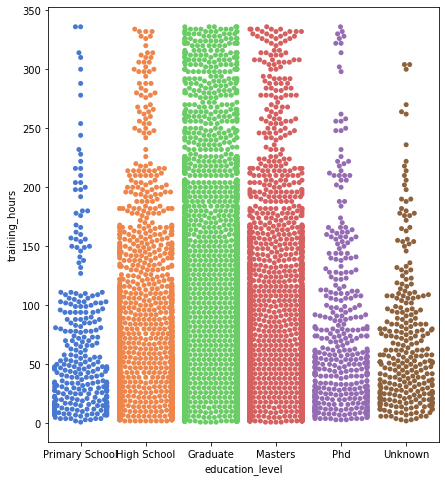

In [603]:
plt.figure(figsize=(7,8));
order = ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd', 'Unknown']
sns.swarmplot(data=df, x='education_level', y='training_hours', order=order, palette=color);

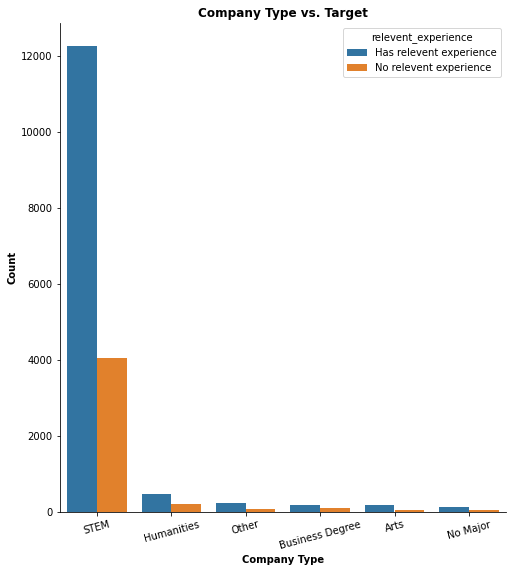

In [604]:
plt.figure(figsize=(8,9))
sns.countplot(data=df, x='major_discipline', hue='relevent_experience', order=df.major_discipline.value_counts().index);

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Company Type vs. Target', fontweight="bold")
plt.xlabel('Company Type', fontweight="bold")
plt.ylabel('Count', fontweight="bold");
plt.xticks(rotation=15);

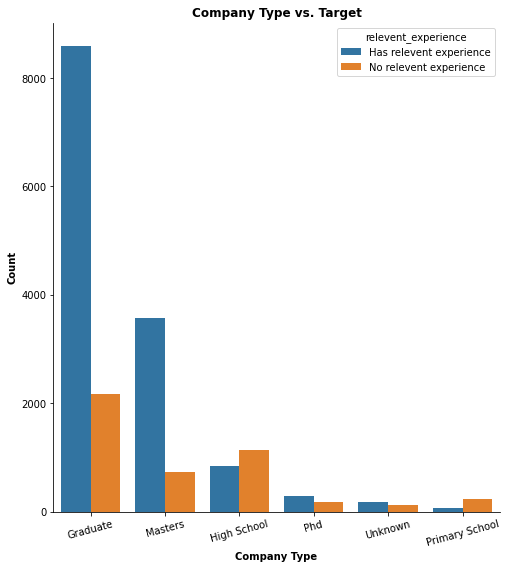

In [605]:
plt.figure(figsize=(8,9))
sns.countplot(data=df, x='education_level', hue='relevent_experience');

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Company Type vs. Target', fontweight="bold")
plt.xlabel('Company Type', fontweight="bold")
plt.ylabel('Count', fontweight="bold");
plt.xticks(rotation=15);

# Creating The Model Using SMOTE (Replacing NULL with 0)

- ## Encoding The Data

In [ ]:
df_2 = copy(df)

In [ ]:
df_2.replace('Unknown', '0', inplace=True)

In [ ]:
df_2.drop('enrollee_id', axis=1, inplace=True);
df_2.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-499,Pvt Ltd,1,106,0
1,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,city_16,0.910,0,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,city_100,0.887,0,No relevent experience,no_enrollment,Masters,STEM,8,0,0,2,88,1


In [ ]:
encoding_columns = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience',
                    'company_size', 'company_type', 'last_new_job', 'target']
encoder = {}
for column in encoding_columns:
    encoder[column] = LabelEncoder()
    df_2[column] = encoder[column].fit_transform(df_2[column])

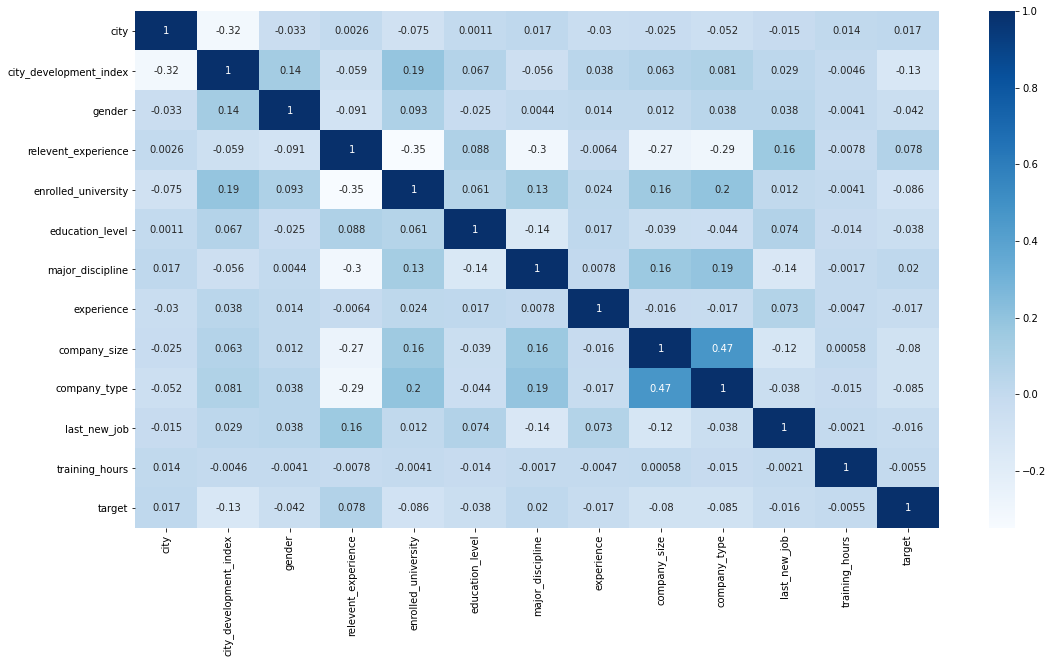

In [ ]:
plt.figure(figsize=(18,9.5))
sns.heatmap(df_2.corr(),cbar = True, annot =True, cmap="Blues");

- ## Normalizing Data 

In [ ]:
def normalize_columns(column):
    return (df_2[column] - df_2[column].min()) / (df_2[column].max() - df_2[column].min())

In [ ]:
for column in df_2.columns:
    df_2[column] = normalize_columns(column)

In [ ]:
df_2.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.336066,0.481038,0.666667,0.0,1.0,0.2,1.0,0.636364,0.250,1.000000,0.166667,0.313433,0.0
1,0.918033,0.948104,0.666667,0.0,1.0,0.2,1.0,0.272727,1.000,0.333333,0.166667,0.202985,0.0
2,0.393443,0.922156,0.000000,0.0,1.0,0.2,1.0,0.772727,0.625,0.833333,0.333333,0.008955,0.0
3,0.762295,0.435130,0.666667,0.0,1.0,0.2,1.0,0.272727,0.625,1.000000,0.166667,0.074627,0.0
4,0.016393,0.876248,0.000000,1.0,1.0,0.6,1.0,0.863636,0.000,0.000000,0.333333,0.259701,1.0


- ## XGBoost Classifier Using SMOTE Replacing NULL with *0*

In [ ]:
columns = ['city', 'city_development_index', 'relevent_experience', 'enrolled_university', 'education_level', 
           'major_discipline', 'experience', 'company_size', 'last_new_job', 'training_hours']

In [ ]:
X = df_2.loc[:,columns].values
Y = df_2.target.values

In [ ]:
X.shape

(18123, 10)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
xgb_grid = {
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5],
            'subsample': [0.6, 0.8],
            'colsample_bytree': [0.6, 0.8],
            'max_depth': [3, 4, 5]
        }

In [ ]:
xgb_classifier =  GridSearchCV(estimator= XGBClassifier(), param_grid=xgb_grid, cv = 3, n_jobs=-1,verbose=1)
xgb_classifier.fit(x_train_res, y_train_res) 

# Summarize results
print("Best: %f using %s" % (xgb_classifier.best_score_, xgb_classifier.best_params_))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  4.3min finished


Best: 0.885460 using {'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}


In [ ]:
xgb_classifier.best_params_

{'colsample_bytree': 0.6,
 'gamma': 1.5,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 0.8}

In [ ]:
accuracy = xgb_classifier.score(x_train, y_train)
print('Testing Accuracy:', round(accuracy *100, 2), '%')

Testing Accuracy: 85.33 %


In [ ]:
accuracy = xgb_classifier.score(x_test, y_test)
print('Testing Accuracy:', round(accuracy *100, 2), '%')

Testing Accuracy: 83.74 %


In [ ]:
xgb_predictions = xgb_classifier.predict(x_test) 
   
# print classification report 
print(metrics.classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      4676
         1.0       0.30      0.12      0.17       761

    accuracy                           0.84      5437
   macro avg       0.59      0.54      0.54      5437
weighted avg       0.79      0.84      0.81      5437



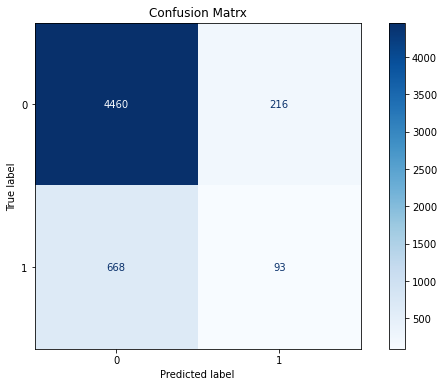

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')
chart = metrics.plot_confusion_matrix(xgb_classifier, x_test, y_test, display_labels= encoder['target'].classes_, ax = ax, cmap="Blues",  values_format = '.0f')
chart.confusion_matrix;

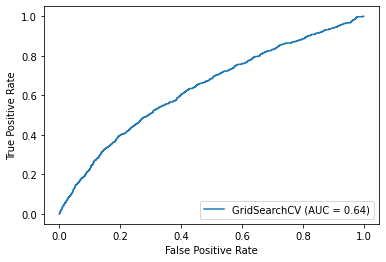

In [ ]:
metrics.plot_roc_curve(xgb_classifier, x_test, y_test)

#Creating The Model Using SMOTE (with Predicted NULL Values) 


- ## Encoding The Data

In [ ]:
df_3.drop('enrollee_id', axis=1, inplace=True);
df_3.head()

In [482]:
df_3.shape

(18123, 13)

In [489]:
df_3.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [484]:
encoding_columns = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience',
                    'company_size', 'company_type', 'last_new_job', 'target']

encoder = {}
for column in encoding_columns:
    encoder[column] = LabelEncoder()
    df_3[column] = encoder[column].fit_transform(df_3[column])

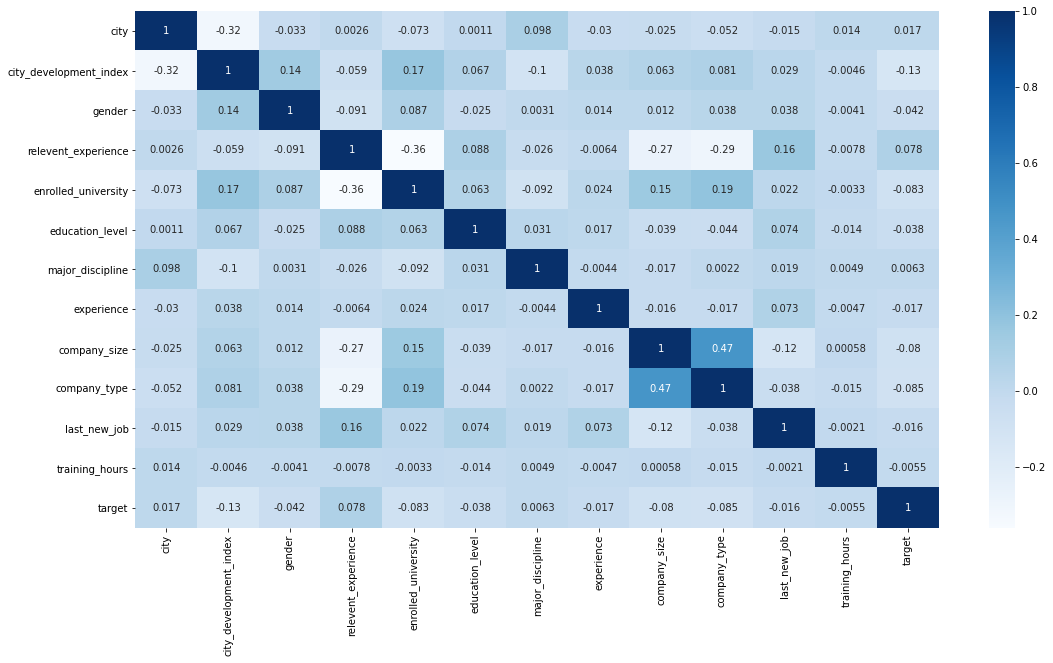

In [485]:
plt.figure(figsize=(18,9.5))
sns.heatmap(df_3.corr(),cbar = True, annot =True, cmap="Blues");

- ## Normalizing The Data

In [486]:
def normalize_columns(column):
    return (df_3[column] - df_3[column].min()) / (df_3[column].max() - df_3[column].min())

In [490]:
for column in df_3.columns:
    df_3[column] = normalize_columns(column)

In [491]:
df_3.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.336066,0.481038,0.666667,0.0,1.0,0.2,1.0,0.636364,0.250,1.000000,0.166667,0.313433,0.0
1,0.918033,0.948104,0.666667,0.0,1.0,0.2,1.0,0.272727,1.000,0.333333,0.166667,0.202985,0.0
2,0.393443,0.922156,0.000000,0.0,1.0,0.2,1.0,0.772727,0.625,0.833333,0.333333,0.008955,0.0
3,0.762295,0.435130,0.666667,0.0,1.0,0.2,1.0,0.272727,0.625,1.000000,0.166667,0.074627,0.0
4,0.016393,0.876248,0.000000,1.0,1.0,0.6,1.0,0.863636,0.000,0.000000,0.333333,0.259701,1.0


- ## XGBoost Classifier Using SMOTE with Predicted NULL Values

In [492]:
columns = ['city', 'city_development_index', 'relevent_experience', 'enrolled_university', 'education_level', 
           'major_discipline', 'experience', 'company_size', 'last_new_job', 'training_hours']

In [493]:
X = df_3.loc[:,columns].values
Y = df_3.target.values

In [494]:
X.shape

(18123, 10)

In [495]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [496]:
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [497]:
xgb_grid = {
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5],
            'subsample': [0.6, 0.8],
            'colsample_bytree': [0.6, 0.8],
            'max_depth': [3, 4, 5]
        }

In [498]:
xgb_classifier =  GridSearchCV(estimator= XGBClassifier(), param_grid=xgb_grid, cv = 3, n_jobs=-1,verbose=1)
xgb_classifier.fit(x_train_res, y_train_res) 

# Summarize results
print("Best: %f using %s" % (xgb_classifier.best_score_, xgb_classifier.best_params_))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  4.3min finished


Best: 0.885731 using {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}


In [499]:
xgb_classifier.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.5,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 0.8}

In [500]:
accuracy = xgb_classifier.score(x_train, y_train)
print('Testing Accuracy:', round(accuracy *100, 2), '%')

Testing Accuracy: 85.57 %


In [501]:
accuracy = xgb_classifier.score(x_test, y_test)
print('Testing Accuracy:', round(accuracy *100, 2), '%')

Testing Accuracy: 83.85 %


In [502]:
xgb_predictions = xgb_classifier.predict(x_test) 
   
# print classification report 
print(metrics.classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      4676
         1.0       0.32      0.14      0.19       761

    accuracy                           0.84      5437
   macro avg       0.60      0.54      0.55      5437
weighted avg       0.79      0.84      0.81      5437



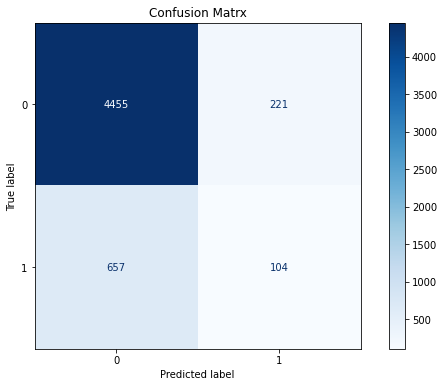

In [503]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')
chart = metrics.plot_confusion_matrix(xgb_classifier, x_test, y_test, display_labels= encoder['target'].classes_, ax = ax, cmap="Blues",  values_format = '.0f')
chart.confusion_matrix;

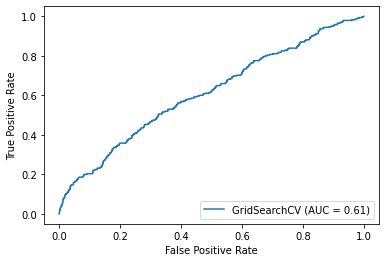

In [ ]:
metrics.plot_roc_curve(xgb_classifier, x_test, y_test)